In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Understanding and exploring the data

In [2]:
# importing libraries
import pandas as pd     # for reading the csv files
import numpy as np      # for the calculations

In [3]:
# reading the dataset
dataset = pd.read_csv('boombikes.csv')

In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
dataset.columns     # to find the list of all the column

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
dataset.describe()      # descriptive analysis

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
dataset.info()      # to check whether there are any null characters or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# replacing values for the seasons
# assigning string values to the seasons instead of numeric values
# 1 - Spring
dataset.loc[(dataset['season'] == 1), 'season'] = 'spring'

# 2 - Summer
dataset.loc[(dataset['season'] == 2), 'season'] = 'summer'

# 3 - Fall
dataset.loc[(dataset['season'] == 3), 'season'] = 'fall'

# 4 - Winter
dataset.loc[(dataset['season'] == 4), 'season'] = 'winter'

In [10]:
# check whether the conversion is done properly or not
dataset['season'].astype('category').value_counts()     # segmentation of seasons are done properly

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# check the days of the year properly
# 0 = 2018, 1 = 2021 : Year
dataset['yr'].astype('category').value_counts()    # segmentations of days of the year is done properly

0    365
1    365
Name: yr, dtype: int64

In [12]:
# replacing values for the months
# assigning string values to the months instead of numeric values
# using functions as there will be 12 lines of code which is not necessary
def object_map_mnths(x):
    return x.map({1: 'Jan',
                  2: 'Feb',
                  3: 'Mar',
                  4: 'Apr',
                  5: 'May',
                  6: 'Jun',
                  7: 'Jul',
                  8: 'Aug',
                  9: 'Sept',
                  10: 'Oct',
                  11: 'Nov',
                  12: 'Dec',})

In [13]:
# updating the dataset properly
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)       # segmentation of months of the year is done properly

In [14]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
dataset['mnth'].astype('category').value_counts()       # check whether the days are missing or not

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [16]:
dataset['holiday'].astype('category').value_counts()    # count number of holidays

0    709
1     21
Name: holiday, dtype: int64

In [17]:
# replacing values for the days
# assigning string values to the days instead of numeric values
# using functions as there will be 12 lines of code which is not necessary
def object_map_weekdays(x):
    return x.map({1: 'Mon',
                  2: 'Tue',
                  3: 'Wed',
                  4: 'Thur',
                  5: 'Fri',
                  6: 'Sat',
                  0: 'Sun',})

In [18]:
# updating the dataset properly
dataset[['weekday']] = dataset[['weekday']].apply(object_map_weekdays)

In [19]:
dataset['weekday'].astype('category').value_counts()

Mon     105
Sat     105
Sun     105
Fri     104
Thur    104
Tue     104
Wed     103
Name: weekday, dtype: int64

In [20]:
dataset['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [21]:
# replacing values for the weather
# assigning string values to the weather instead of numeric values
# 1 - Clear, Few Clouds, Partly Cloudy
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'A'

# 2 - Mist, Cloudy
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'B'

# 3 - Light Snow, Heavy Rain
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'C'

In [22]:
dataset['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [23]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2. Data Visualization

In [24]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns               # mapping heatmaps

### Temperature

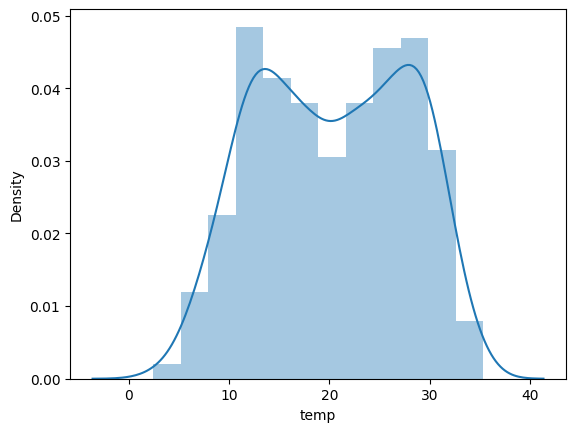

In [25]:
sns.distplot(dataset['temp'])
plt.show()

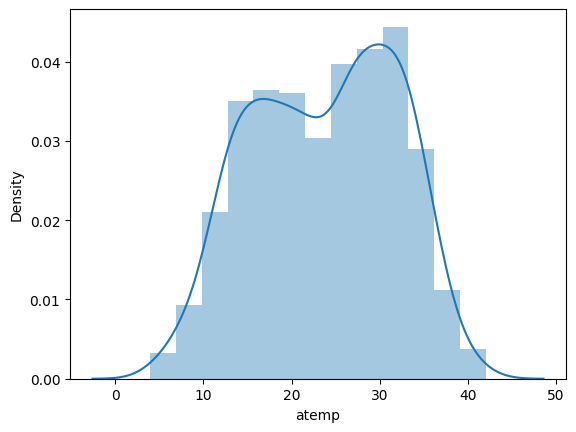

In [26]:
# plotting actual temeprature
sns.distplot(dataset['atemp'])
plt.show()

### Windspeed

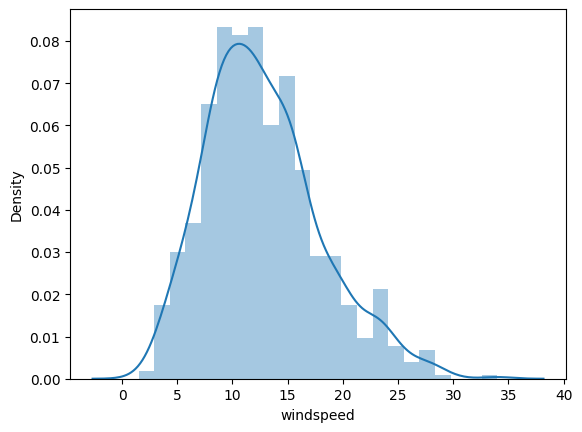

In [27]:
sns.distplot(dataset['windspeed'])
plt.show()

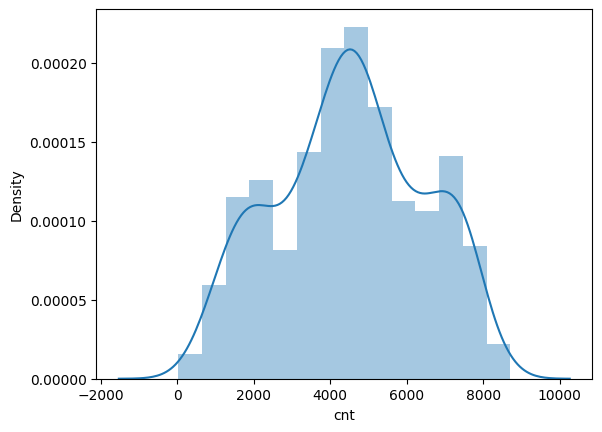

In [28]:
# target variables: count of total rental bikes including both casual and registered
sns.distplot(dataset['cnt'])
plt.show()

In [29]:
# converting date to datetime format
dataset['dteday'] = dataset['dteday'].astype('datetime64')

In [30]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [31]:
dataset_categorical = dataset.select_dtypes(exclude=['float64', 'datetime64', 'int64'] )

In [32]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [33]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thur,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


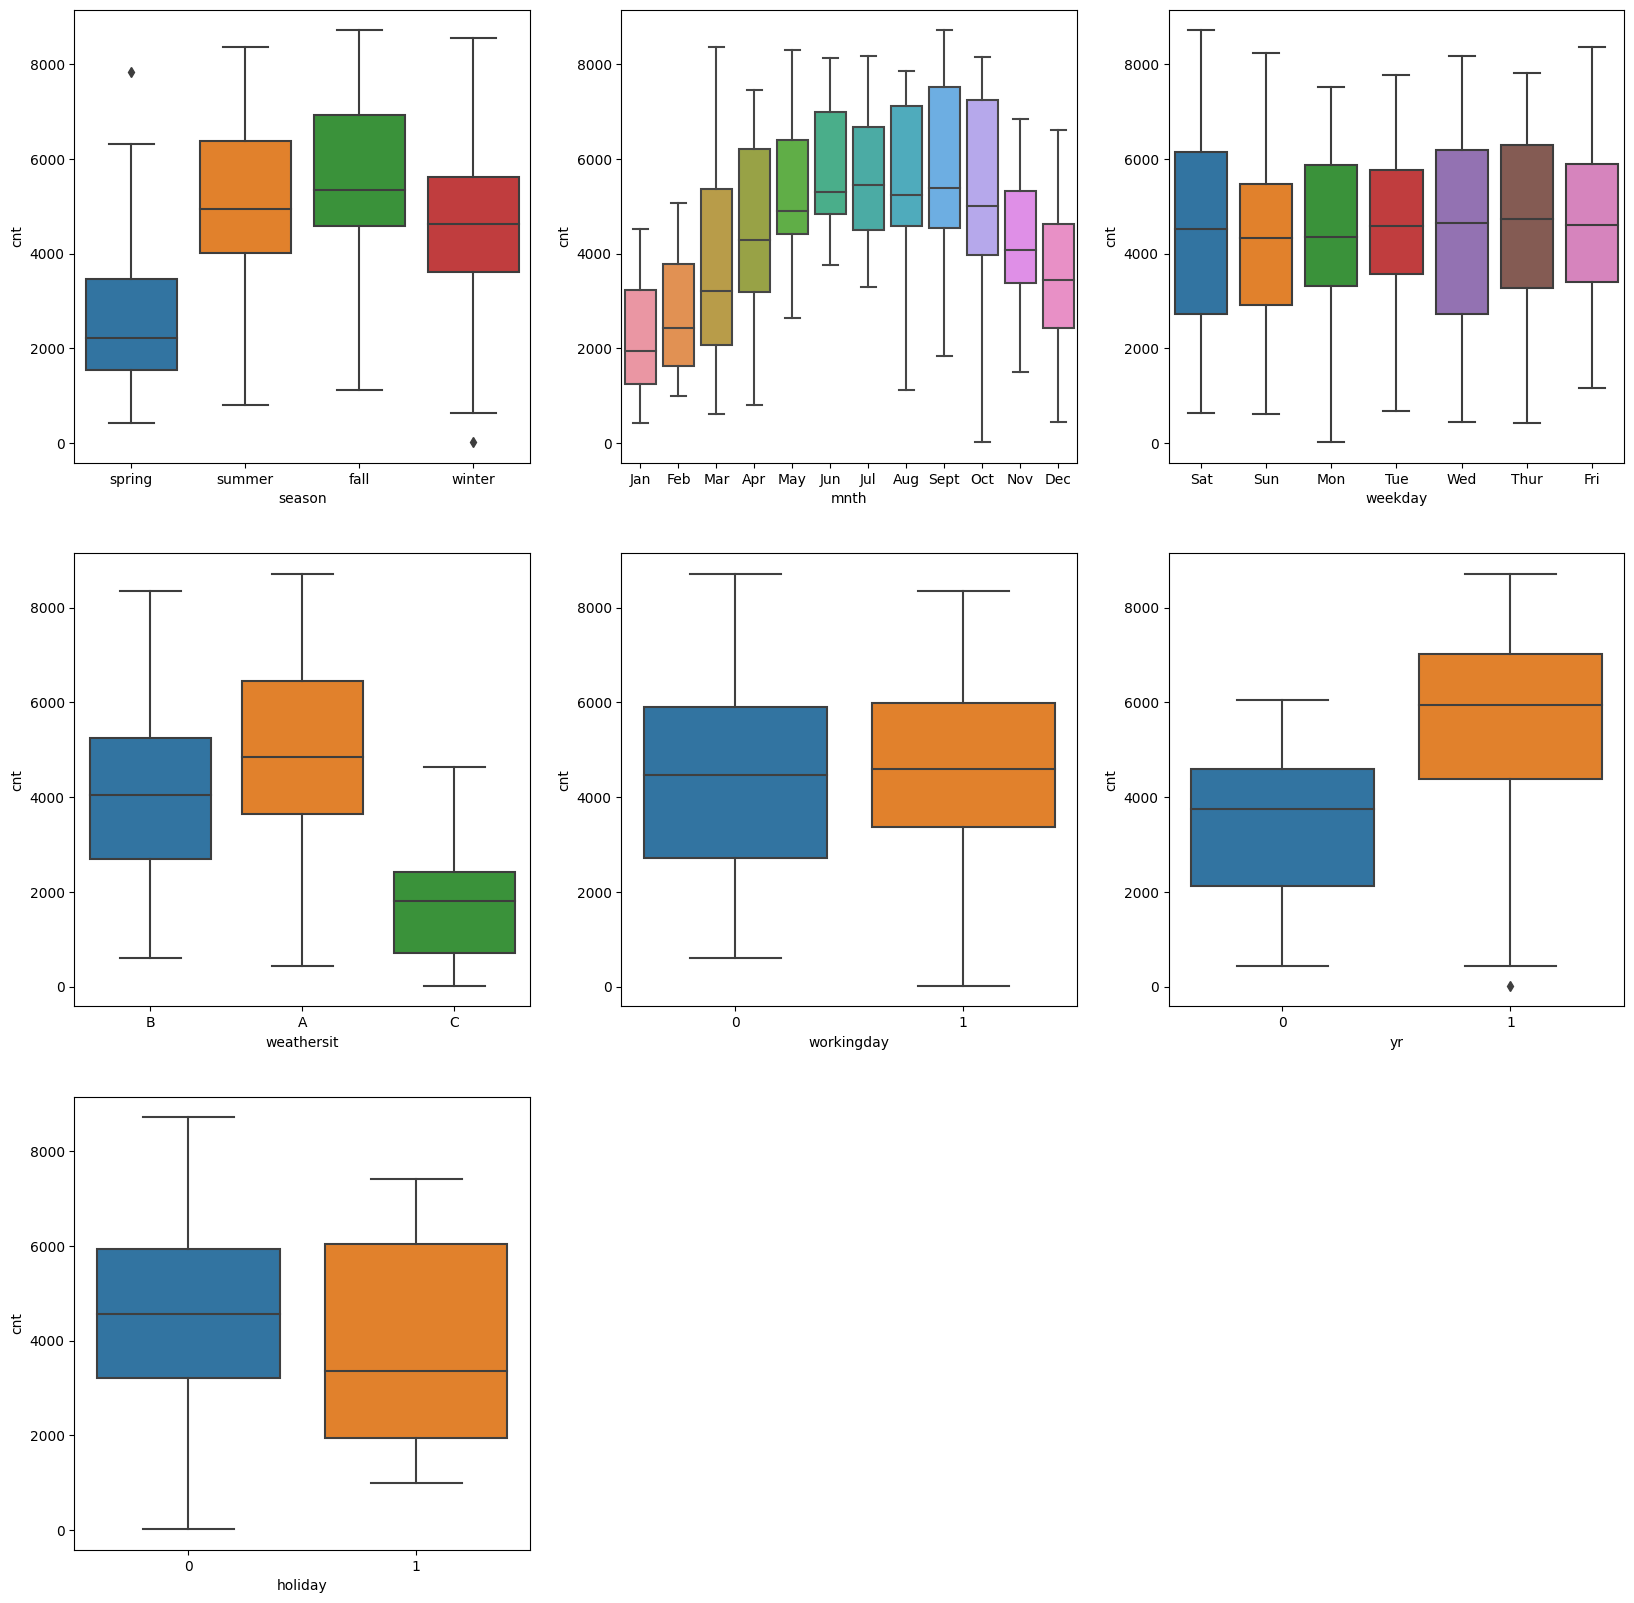

In [34]:
# creating boxplots and subplots
plt.figure(figsize=(20,20))     # size of 20 x 20
plt.subplot(3,3,1)
sns.boxplot(x ='season', y = 'cnt', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x ='mnth', y = 'cnt', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x ='weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x ='weathersit', y = 'cnt', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x ='workingday', y = 'cnt', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x ='yr', y = 'cnt', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x ='holiday', y = 'cnt', data = dataset)
plt.show()

In [35]:
IntVarlist = ['casual', 'registered', 'cnt']
for var in IntVarlist:
    dataset[var] = dataset[var].astype('float')

In [36]:
dataset_numeric = dataset.select_dtypes(include = ['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


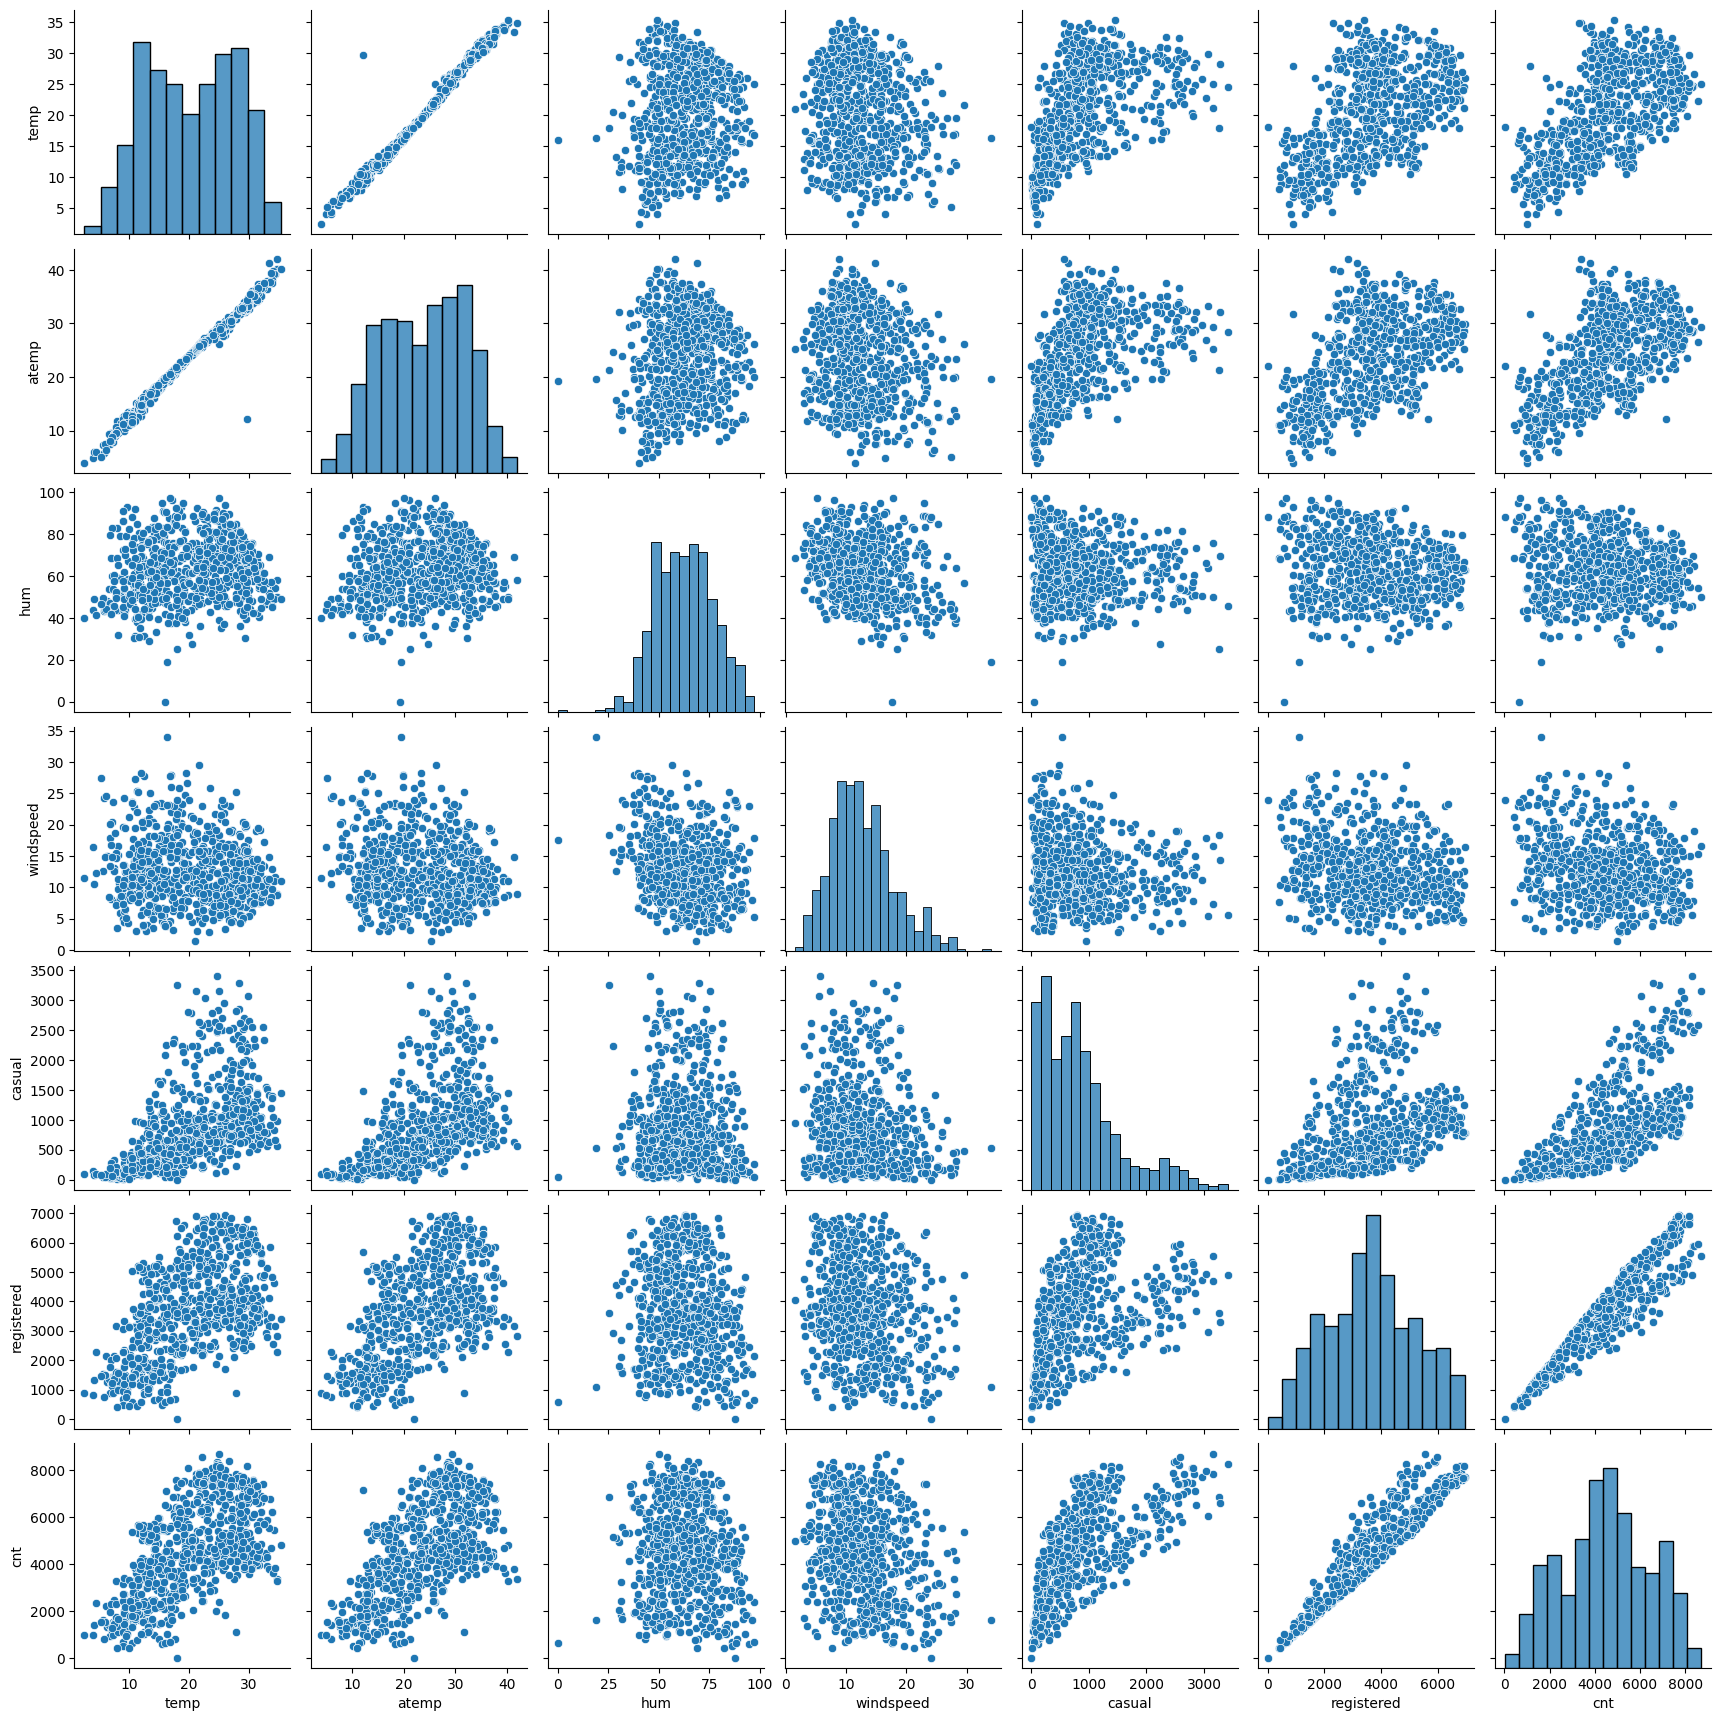

In [37]:
sns.pairplot(dataset_numeric)
plt.show()

In [38]:
# correlation matrix
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot: >

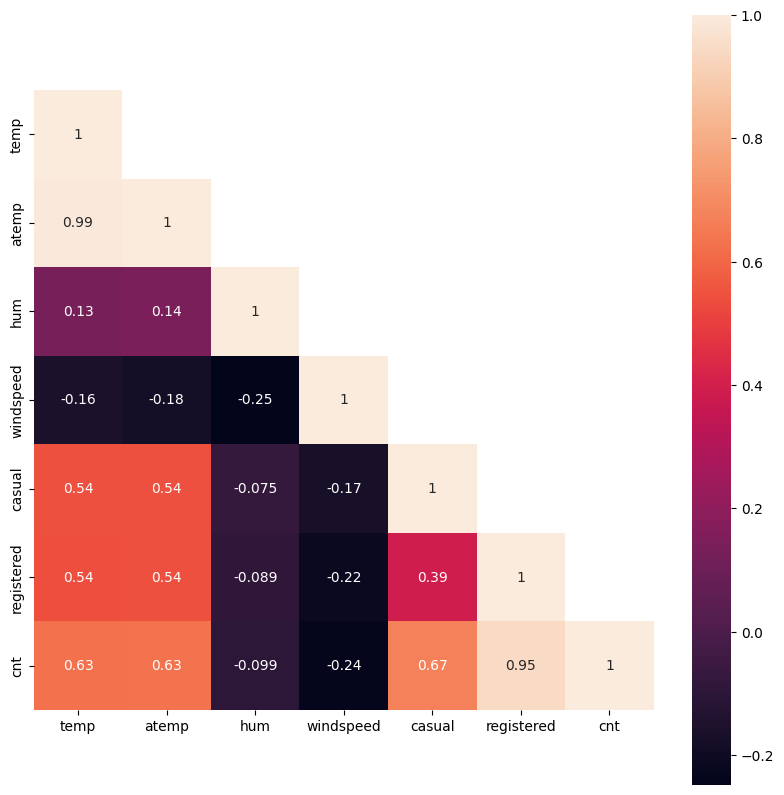

In [39]:
# creating a heatmap of the "cor"
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(cor, mask = mask, vmax = 1, square = True, annot = True)

In [40]:
# removing atemp as it is highly correlated with temp
dataset.drop('atemp', axis = 1, inplace = True)

In [41]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## 3. Data Preparation

In [42]:
dataset_categorical = dataset.select_dtypes(include=['object'])

In [43]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [44]:
dataset_dummy = pd.get_dummies(dataset_categorical, drop_first = True)
dataset_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# dropping categorical variable
dataset = dataset.drop(list(dataset_categorical.columns), axis = 1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [46]:
# concatenate dummy variables with the dataset
dataset = pd.concat([dataset, dataset_dummy], axis = 1)

In [47]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
dataset = dataset.drop(['instant', 'dteday'], axis = 1, inplace = False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


## 4. Building & Evaluation of the Model

In [49]:
# importing the libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression       # for algorithms

In [50]:
# splitting the datafram into train and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)      # splitting the entire datafram not on the basis of the parameters

In [51]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
# applying scaler to all columns except the dummy variables
var = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [55]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


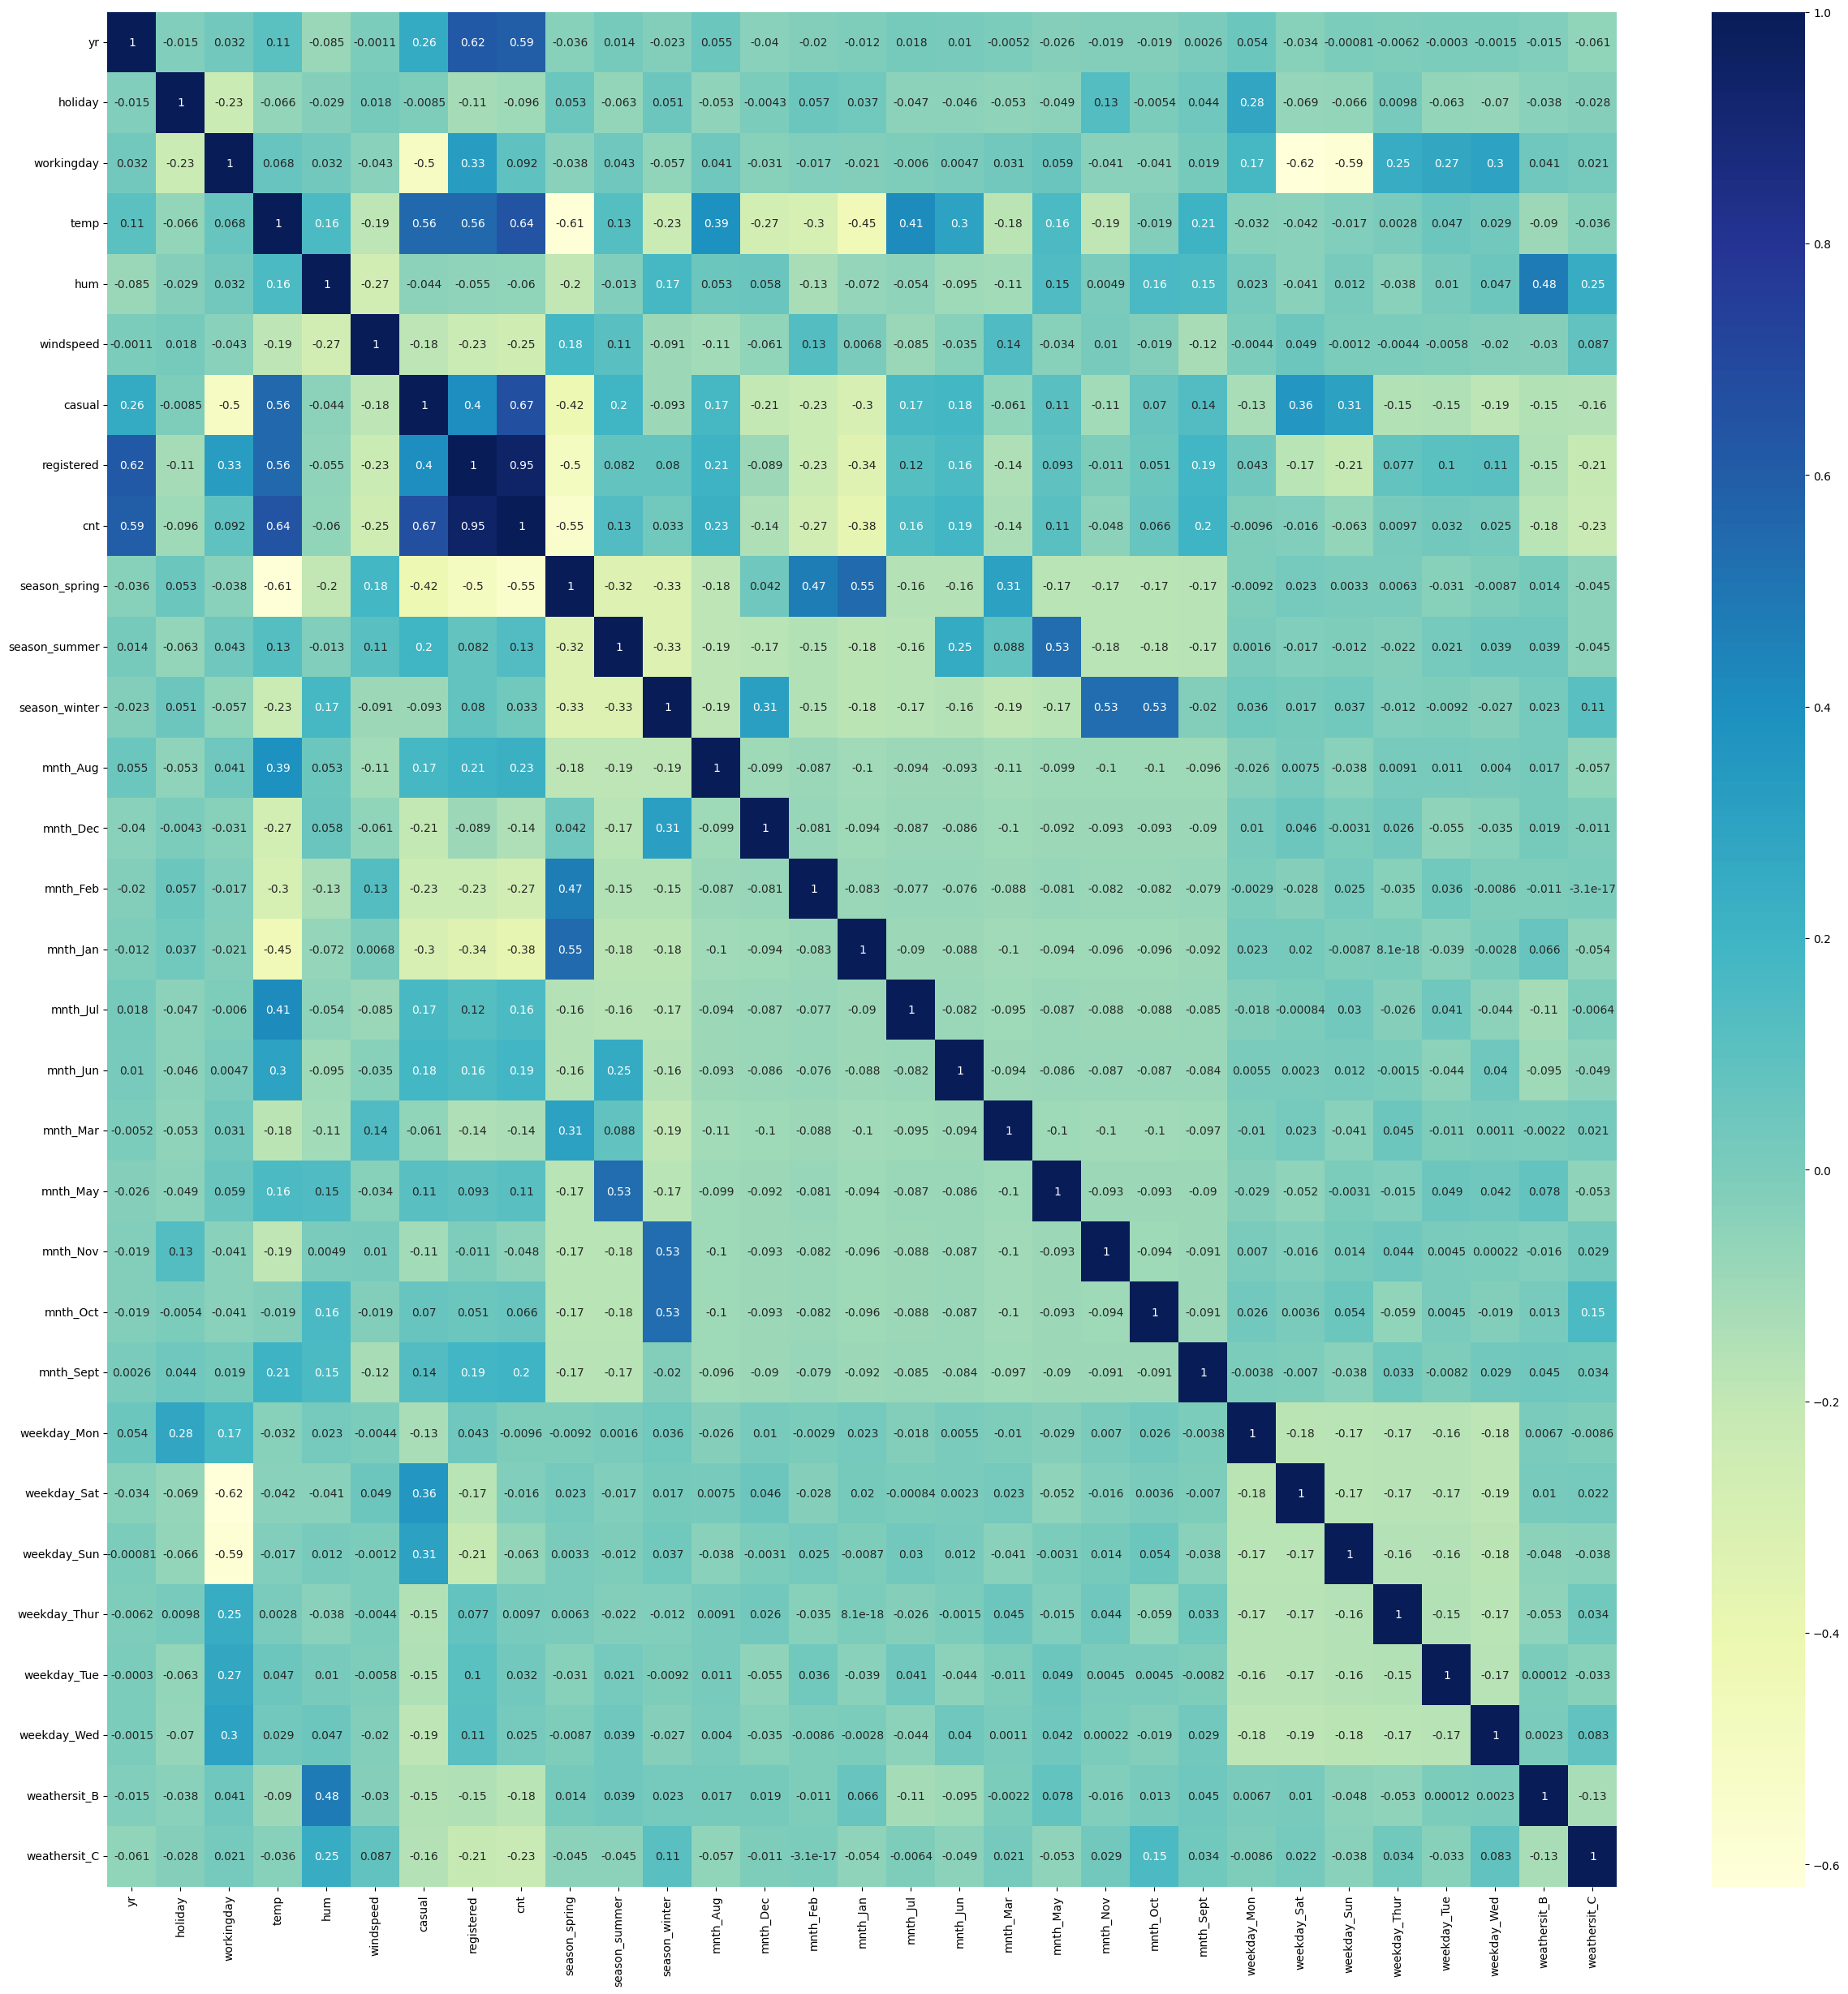

In [57]:
# checking the correlation coefficient to see which variables are highly correlated
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [58]:
# Dividing dependent and independent variables
y_train = df_train.pop('cnt')
x_train = df_train.drop(['casual', 'registered'], axis = 1)

In [59]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
np.array(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [61]:
np.array(x_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [62]:
np.array(y_train)

array([0.86424298, 0.82765762, 0.46525541, 0.20409572, 0.48297285,
       0.19109526, 0.78255867, 0.85158767, 0.71030833, 0.49988495,
       0.69247584, 0.98170732, 0.47491947, 0.73791993, 0.54130235,
       0.88564197, 0.52082375, 0.66532444, 0.71479521, 0.51058445,
       0.59468477, 0.64565117, 0.80947998, 0.6026231 , 0.34871146,
       0.78267372, 0.47181316, 0.79889554, 0.83617119, 0.52554073,
       0.39127934, 0.57742752, 0.38541187, 0.51645191, 0.5716751 ,
       0.57386102, 0.16946618, 0.50080534, 0.77795674, 0.66589968,
       0.61585366, 0.46882191, 0.26138978, 0.13598711, 0.62149103,
       0.53117809, 0.73032674, 0.78324896, 0.71870686, 0.84272895,
       0.53060285, 0.80349747, 0.4723884 , 0.50368155, 0.67280258,
       0.61205706, 0.76725725, 0.5961804 , 0.55430281, 0.76127474,
       0.36136677, 0.46537046, 0.63851818, 0.30349747, 0.63034975,
       0.71111367, 0.58271974, 0.47526461, 0.33260469, 0.69132536,
       0.6916705 , 0.42625403, 0.90232398, 0.13173033, 0.58858

In [63]:
import statsmodels.api as sm        # getting stats models
x_train_lm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_lm).fit()

In [64]:
lr.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon     -0.020907
weekday_Sat      0.096389
weekday_Sun      0.041853
weekday_Thur    -0.009237
weekday_Tue     -0.018890
weekday_Wed     -0.005388
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [65]:
lm = LinearRegression()
lm.fit(x_train, y_train)    # fitting x_train and y_train

LinearRegression()

In [66]:
print(lm.coef_)
print(lm.intercept_)

[ 2.32115721e-01  1.99139263e+12  1.99139263e+12  4.52937918e-01
 -1.50974454e-01 -1.85198056e-01 -4.96571183e-02  3.85162729e-02
  1.04413725e-01  1.36366174e-02 -4.38523125e-02 -3.00330054e-02
 -6.03563310e-02 -4.07661012e-02 -2.35233894e-03  3.84198204e-03
  2.26763430e-02 -4.05883789e-02  9.73510742e-03  8.24203491e-02
 -2.01416016e-02  1.99139263e+12  1.99139263e+12 -8.69750977e-03
 -1.84831619e-02 -5.13458252e-03 -6.10351562e-02 -2.57995605e-01]
-1991392629332.2961


In [67]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          8.74e-182
Time:                        16:43:05   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon      -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat       0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun       0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thur     -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue      -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed      -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     6.99e+15
================================================================

In [68]:
# reducing the number of featues
# reducing recursive eleimination method is used in this
from sklearn.feature_selection import RFE

In [69]:
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select = 15)     # using only 15 features
rfe1.fit(x_train, y_train)     # fit with 15 features
print(rfe1.support_)       # returns true or false
print(rfe1.ranking_)       # returns the rank

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  8  4  5  2  1 14 13  6  3 10  1  7  1  1 11
  9 12  1  1]


In [70]:
# adding support column instead of training
col1 = x_train.columns[rfe1.support_]

In [71]:
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [72]:
x_train_rfe1 = x_train[col1]        # these columns contains only true data
x_train_rfe1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.13e-191
Time:                        16:43:05   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181      0.000       0.144       0.253
yr                0.2297      0.008     28.660      0.000       0.214       0.245
holiday          -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday        0.0837      0.010      8.672      0.000       0.065       0.103
temp              0.5278      0.033     15.897      0.000       0.463       0.593
hum              -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed        -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring    -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer     0.0526      0.015      3.553      0.000       0.024       0.082
season_winter     0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul         -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sept         0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sat       0.0937      0.012      8.045      0.000       0.071       0.117
weekday_Sun       0.0405      0.012      3.304      0.001       0.016       0.065
weathersit_B     -0.0578      0.010     -5.559      0.000      -0.078      -0.037
weathersit_C     -0.2463      0.026     -9.449      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     5.73e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
a = x_train_rfe1.drop('const', axis = 1)

In [75]:
# evaluating VIFs
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)       # rounding off to 2 signinficat figues
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,workingday,50.69
11,weekday_Sat,12.20
12,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
13,weathersit_B,1.57


In [76]:
# breaking down the above output to only 7
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select = 7)     # using only 7 features
rfe2.fit(x_train, y_train)     # fit with 15 features
print(rfe2.support_)       # returns true or false
print(rfe2.ranking_)       # returns the rank

[ True  True  True  True False False False False False False False False
 False False False False False False False False False  True  True False
 False False False  True]
[ 1  1  1  1  3  2  4  9  8 16 12 13 10  5 22 21 14 11 18  7 15  1  1 19
 17 20  6  1]


In [77]:
# adding support column instead of training
col2 = x_train.columns[rfe2.support_]

In [78]:
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'weekday_Sat', 'weekday_Sun',
       'weathersit_C'],
      dtype='object')

In [79]:
x_train_rfe2 = x_train[col2]        # these columns contains only true data
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          1.41e-138
Time:                        16:43:06   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0578      0.013      4.579      0.000       0.033       0.083
yr               0.2326      0.011     22.100      0.000       0.212       0.253
holiday         -0.0400      0.026     -1.509      0.132      -0.092       0.012
workingday       0.0426      0.010      4.360      0.000       0.023       0.062
temp             0.5740      0.023     24.565      0.000       0.528       0.620
weekday_Sat      0.0518      0.013      3.951      0.000       0.026       0.078
weekday_Sun      0.0034      0.013      0.252      0.801      -0.023       0.030
weathersit_C    -0.2371      0.031     -7.646      0.000      -0.298      -0.176
==============================================================================
Omnibus:                       11.140   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.480
Skew:                          -0.320   Prob(JB):                      0.00321
Kurtosis:                       3.362   Cond. No.                     5.51e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
b = x_train_rfe2.drop('const', axis = 1)

In [81]:
# evaluating VIFs
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)       # rounding off to 2 signinficat figues
vif1 = vif1.sort_values(by = 'VIF', ascending = False)
vif1

,features,VIF
2,workingday,5.51
4,weekday_Sat,1.91
5,weekday_Sun,1.88
1,holiday,1.11
0,yr,1.02
3,temp,1.02
6,weathersit_C,1.01


In [82]:
# predicting values
y_train_cnt = lm2.predict(x_train_rfe2)

<AxesSubplot: ylabel='Density'>

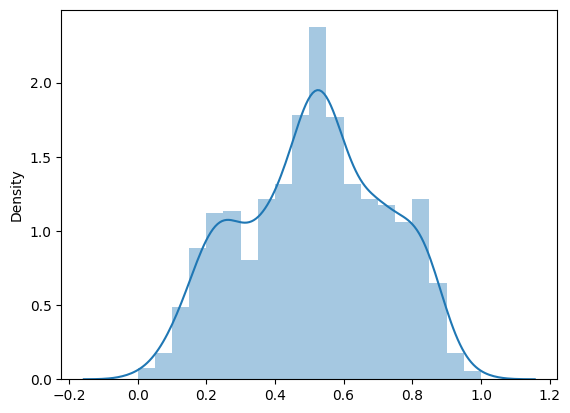

In [83]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins = 20)

In [84]:
# creating the test
df_test[var] = scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,1,...,0,0,0,0,1,0,0,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,0,...,1,0,0,0,0,0,0,1,1,0


In [85]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(['casual', 'registered'], axis = 1)

In [86]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
c = x_train_rfe2.drop('const', axis = 1)

In [88]:
c.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'weekday_Sat', 'weekday_Sun',
       'weathersit_C'],
      dtype='object')

In [89]:
col2 = c.columns
x_test_rfe2 = x_test[col2]

In [90]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [91]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   weekday_Sat   219 non-null    uint8  
 6   weekday_Sun   219 non-null    uint8  
 7   weathersit_C  219 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 10.9 KB


In [92]:
y_pred = lm2.predict(x_test_rfe2)

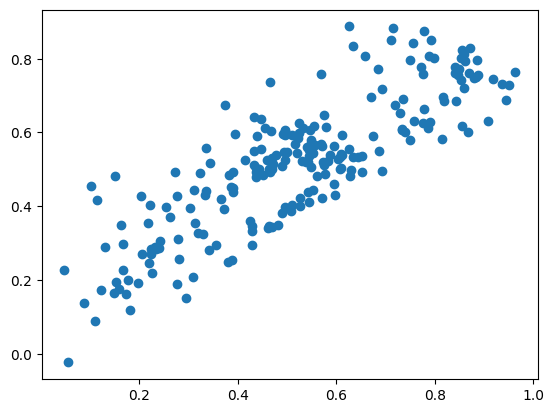

In [93]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.show()

In [94]:
# getting the matrix
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6983957256155086

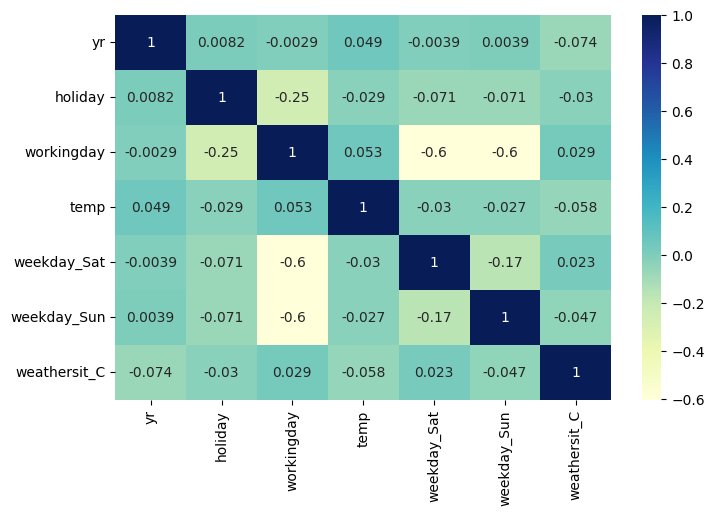

In [95]:
# checking with respect to the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(), cmap = "YlGnBu", annot = True)
plt.show()